[INFO] Número de imagens: 1797
[INFO] Pixels por imagem: 64
[INFO] Imagem aleatória do MNIST com label '1':


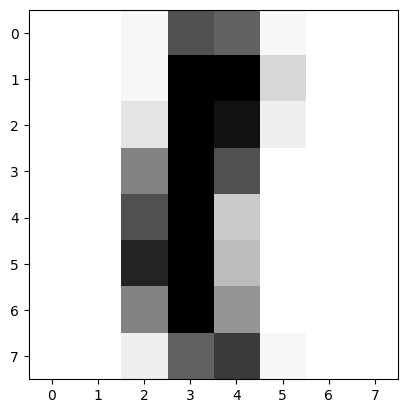

In [2]:
# importar as bibliotecas necessárias
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
# importar o conjunto de dados MNIST
dataset = load_digits()
(data, labels) = (dataset.data, dataset.target)
# Exibir algumas informações do dataset MNIST
print("[INFO] Número de imagens: {}".format(data.shape[0]))
print("[INFO] Pixels por imagem: {}".format(data.shape[1]))
# escolher um índice aleatório do dataset e exibir
# a imagem e label correspondente
np.random.seed(42)
randomIndex = np.random.randint(0, data.shape[0])
print("[INFO] Imagem aleatória do MNIST com label '{:.0f}':".format(labels[randomIndex]))
plt.imshow(data[randomIndex].reshape((8,8)), cmap="Greys")
plt.show()

In [10]:
img = "[ 0.  0.  1. 12. 11.  1.  0.  0.  0.  0.  1. 16. 16.  4.  0.  0.  0.  0. 3. 16. 15.  2.  0.  0.  0.  0.  9. 16. 12.  0.  0.  0.  0.  0. 12. 16. 5.  0.  0.  0.  0.  0. 14. 16.  6.  0.  0.  0.  0.  0.  9. 16.  8.  0.0.  0.  0.  0.  2. 11. 13.  1.  0.  0.]"
img.replace(".", ".0,")

'[ 0.0,  0.0,  1.0, 12.0, 11.0,  1.0,  0.0,  0.0,  0.0,  0.0,  1.0, 16.0, 16.0,  4.0,  0.0,  0.0,  0.0,  0.0, 3.0, 16.0, 15.0,  2.0,  0.0,  0.0,  0.0,  0.0,  9.0, 16.0, 12.0,  0.0,  0.0,  0.0,  0.0,  0.0, 12.0, 16.0, 5.0,  0.0,  0.0,  0.0,  0.0,  0.0, 14.0, 16.0,  6.0,  0.0,  0.0,  0.0,  0.0,  0.0,  9.0, 16.0,  8.0,  0.0,0.0,  0.0,  0.0,  0.0,  2.0, 11.0, 13.0,  1.0,  0.0,  0.0,]'

In [3]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)
random_forest.fit(data_train, labels_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [5]:
from sklearn.metrics import classification_report

label_predicts = random_forest.predict(data_test)

print("Retorno da classificação:")
print(classification_report(label_predicts, labels_test))

Retorno da classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.98      0.88      0.92        56
           2       0.96      0.98      0.97        46
           3       0.96      0.93      0.95        56
           4       0.98      0.97      0.98        61
           5       0.92      0.91      0.92        67
           6       0.98      0.98      0.98        53
           7       0.95      0.98      0.96        53
           8       0.93      0.93      0.93        43
           9       0.86      0.98      0.92        52

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [6]:
import pickle

# Salvar o modelo em um arquivo
with open('../app/modelo.pkl', 'wb') as model_file:
    pickle.dump(random_forest, model_file)